A1. For the data table provided below, calculate the entropy associated with each attribute / feature 
at the root node. Using this information, identify the first feature that you’d select for constructing 
the decision tree.

In [ ]:
import pandas as pd
df=pd.read_csv("Decision_tree.csv")
df


,age,income,student,credit_rating,buys_computer,Unnamed: 5
0,<=30,high,no,fair,no,NaN
1,<=30,high,no,excellent,no,NaN
2,31..40,high,no,fair,yes,NaN
3,>40,medium,no,fair,yes,NaN
4,>40,low,yes,fair,yes,NaN
5,>40,low,yes,excellent,no,NaN
6,31..40,low,yes,excellent,yes,NaN
7,<=30,medium,no,fair,no,NaN
8,<=30,low,yes,fair,yes,NaN
9,>40,medium,yes,fair,yes,NaN


In [ ]:
import math

def entropy(p,n):
  if p == 0:
    t1=0
  else:
    t1=(p/(p+n)) * math.log2(p/(p+n))
  if n == 0:
    t2=0
  else:
    t2=(n/(p+n)) * math.log2(n/(p+n))
  s=-t1-t2
  return s

# b= entropy(4,0)
# print(b)

In [ ]:
def count(d):
  cyes=0
  cno=0
  for x in d['buys_computer']:
    if x == 'yes':
      cyes=cyes+1
    if x == 'no':
      cno=cno + 1
  return cyes, cno;

# y, n = count(dfage2)

# print(y)
# print(n)

In [ ]:
dfage1 = df.loc[df['age'] == '<=30']
dfage2 = df.loc[df['age'] == '31..40']
dfage3 = df.loc[df['age'] == '>40']

dfincome1 = df.loc[df['income'] == 'high']
dfincome2 = df.loc[df['income'] == 'medium']
dfincome3 = df.loc[df['income'] == 'low']

dfstudent1 = df.loc[df['student'] == 'yes']
dfstudent2 = df.loc[df['student'] == 'no']

dfcredit1 = df.loc[df['credit_rating'] == 'fair']
dfcredit2 = df.loc[df['credit_rating'] == 'excellent']
# print(dfcredit2)


In [ ]:
cage1y, cage1n = count(dfage1)
cage2y, cage2n = count(dfage2)
cage3y, cage3n = count(dfage3)

cincome1y, cincome1n = count(dfincome1)
cincome2y, cincome2n = count(dfincome2)
cincome3y, cincome3n = count(dfincome3)

cstudent1y, cstudent1n = count(dfstudent1)
cstudent2y, cstudent2n = count(dfstudent2)

ccredit1y, ccredit1n = count(dfcredit1)
ccredit2y, ccredit2n = count(dfcredit2)

# print(cage2y, cage2n)

In [ ]:

enage= entropy(cage1y,cage1n) + entropy(cage2y,cage2n) + entropy(cage3y,cage3n)
# enage= ((cage1y+cage1n)/14) * entropy(cage1y,cage1n) + ((cage2y+cage2n)/14) * entropy(cage2y,cage2n) + ((cage3y+cage3n)/14) * entropy(cage3y,cage3n)

enincome= entropy(cincome1y,cincome1n) + entropy(cincome2y,cincome2n) + entropy(cincome3y,cincome3n)

enstudent= entropy(cstudent1y,cstudent1n) + entropy(cstudent2y,cstudent2n)

encredit= entropy(ccredit1y,ccredit1n) + entropy(ccredit2y,ccredit2n)

print(enage)
print(enincome)
print(enstudent)
print(encredit)

1.9419011889093372
2.7295739585136225
1.576900914616579
1.811278124459133


In [ ]:
var = {enage:"enage",enincome:"enincome",enstudent:"enstudent",encredit:"encredit"}
a=var.get(min(var))

print("As per entropy analysis, the  value with least entropy must be taken")
print("The value with least entropy is",a)

As per entropy analysis, the  value with least entropy must be taken
The value with least entropy is enstudent


A2. Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [ ]:
# Class A
imgAv1 = imread('2.jpg')
feature_matriximgAv1 = np.zeros((256,256)) 
feature_matriximgAv1.shape
for i in range(0,imgAv1.shape[0]):
    for j in range(0,imgAv1.shape[1]):
        feature_matriximgAv1[i][j] = ((int(imgAv1[i,j,0]) + int(imgAv1[i,j,1]) + int(imgAv1[i,j,2]))/3)
featureAv1 = np.reshape(feature_matriximgAv1, (256*256))

imgAv2 = imread('3.jpg')
feature_matriximgAv2 = np.zeros((256,256)) 
feature_matriximgAv2.shape
for i in range(0,imgAv2.shape[0]):
    for j in range(0,imgAv2.shape[1]):
        feature_matriximgAv2[i][j] = ((int(imgAv2[i,j,0]) + int(imgAv2[i,j,1]) + int(imgAv2[i,j,2]))/3)
featureAv2 = np.reshape(feature_matriximgAv2, (256*256))

imgAv3 = imread('4.jpg')
feature_matriximgAv3 = np.zeros((256,256)) 
feature_matriximgAv3.shape
for i in range(0,imgAv3.shape[0]):
    for j in range(0,imgAv3.shape[1]):
        feature_matriximgAv3[i][j] = ((int(imgAv3[i,j,0]) + int(imgAv3[i,j,1]) + int(imgAv3[i,j,2]))/3)
featureAv3 = np.reshape(feature_matriximgAv3, (256*256))

imgAv4 = imread('5.jpg')
feature_matriximgAv4 = np.zeros((256,256)) 
feature_matriximgAv4.shape
for i in range(0,imgAv4.shape[0]):
    for j in range(0,imgAv4.shape[1]):
        feature_matriximgAv4[i][j] = ((int(imgAv4[i,j,0]) + int(imgAv4[i,j,1]) + int(imgAv4[i,j,2]))/3)
featureAv4 = np.reshape(feature_matriximgAv4, (256*256))

imgAv5 = imread('6.jpg')
feature_matriximgAv5 = np.zeros((256,256)) 
feature_matriximgAv5.shape
for i in range(0,imgAv5.shape[0]):
    for j in range(0,imgAv5.shape[1]):
        feature_matriximgAv5[i][j] = ((int(imgAv5[i,j,0]) + int(imgAv5[i,j,1]) + int(imgAv5[i,j,2]))/3)
featureAv5 = np.reshape(feature_matriximgAv5, (256*256))

ClassA=np.array([featureAv1,featureAv2,featureAv3,featureAv4,featureAv5])

print(ClassA)

[[240.         242.         244.         ... 184.66666667 180.
  184.        ]
 [ 61.          60.66666667  61.66666667 ...  72.66666667  70.66666667
   68.66666667]
 [202.33333333 202.33333333 202.33333333 ... 113.33333333  70.33333333
   80.33333333]
 [238.66666667 240.66666667 242.66666667 ... 225.33333333 224.66666667
  184.66666667]
 [233.         232.         231.         ...  23.          15.
    8.        ]]


In [ ]:
# Class B
imgBv1 = imread('7.jpg')
feature_matriximgBv1 = np.zeros((256,256)) 
feature_matriximgBv1.shape
for i in range(0,imgBv1.shape[0]):
    for j in range(0,imgBv1.shape[1]):
        feature_matriximgBv1[i][j] = ((int(imgBv1[i,j,0]) + int(imgBv1[i,j,1]) + int(imgBv1[i,j,2]))/3)
featureBv1 = np.reshape(feature_matriximgBv1, (256*256))

imgBv2 = imread('8.jpg')
feature_matriximgBv2 = np.zeros((256,256)) 
feature_matriximgBv2.shape
for i in range(0,imgBv2.shape[0]):
    for j in range(0,imgBv2.shape[1]):
        feature_matriximgBv2[i][j] = ((int(imgBv2[i,j,0]) + int(imgBv2[i,j,1]) + int(imgBv2[i,j,2]))/3)
featureBv2 = np.reshape(feature_matriximgBv2, (256*256))

imgBv3 = imread('9.jpg')
feature_matriximgBv3 = np.zeros((256,256)) 
feature_matriximgBv3.shape
for i in range(0,imgBv3.shape[0]):
    for j in range(0,imgBv3.shape[1]):
        feature_matriximgBv3[i][j] = ((int(imgBv3[i,j,0]) + int(imgBv3[i,j,1]) + int(imgBv3[i,j,2]))/3)
featureBv3 = np.reshape(feature_matriximgBv3, (256*256))

imgBv4 = imread('10.jpg')
feature_matriximgBv4 = np.zeros((256,256)) 
feature_matriximgBv4.shape
for i in range(0,imgBv4.shape[0]):
    for j in range(0,imgBv4.shape[1]):
        feature_matriximgBv4[i][j] = ((int(imgBv4[i,j,0]) + int(imgBv4[i,j,1]) + int(imgBv4[i,j,2]))/3)
featureBv4 = np.reshape(feature_matriximgBv4, (256*256))

imgBv5 = imread('11.jpg')
feature_matriximgBv5 = np.zeros((256,256)) 
feature_matriximgBv5.shape
for i in range(0,imgBv5.shape[0]):
    for j in range(0,imgBv5.shape[1]):
        feature_matriximgBv5[i][j] = ((int(imgBv5[i,j,0]) + int(imgBv5[i,j,1]) + int(imgBv5[i,j,2]))/3)
featureBv5 = np.reshape(feature_matriximgBv5, (256*256))

ClassB=np.array([featureBv1,featureBv2,featureBv3,featureBv4,featureBv5])

print(ClassB)

[[164.33333333 163.33333333 162.33333333 ... 210.66666667 212.66666667
  214.66666667]
 [130.         130.         130.         ...  96.33333333 122.66666667
  103.66666667]
 [242.         245.         246.         ... 192.66666667 196.33333333
  199.33333333]
 [121.66666667 119.66666667 117.66666667 ... 113.66666667 113.66666667
   74.66666667]
 [208.33333333 211.33333333 211.33333333 ... 102.          86.
   90.33333333]]


In [ ]:
meanAv1=featureAv1.mean(axis=0)
meanAv2=featureAv2.mean(axis=0)
meanAv3=featureAv3.mean(axis=0)
meanAv4=featureAv4.mean(axis=0)
meanAv5=featureAv5.mean(axis=0)

ClassA_label=np.array([meanAv1,meanAv2,meanAv3,meanAv4,meanAv5])
print(ClassA_label)

meanBv1=featureBv1.mean(axis=0)
meanBv2=featureBv2.mean(axis=0)
meanBv3=featureBv3.mean(axis=0)
meanBv4=featureBv4.mean(axis=0)
meanBv5=featureBv5.mean(axis=0)

ClassB_label=np.array([meanBv1,meanBv2,meanBv3,meanBv4,meanBv5])
print(ClassB_label)

# for i in range(0,5):
#   if ClassA_label[i]<100:
#     ClassA_label[i]=0
#   else:
#     ClassA_label[i]=1

for i in range(0,5):
  if ClassA_label[i]<95:
    ClassA_label[i]=-1
  elif ClassA_label[i]<110:
    ClassA_label[i]=0
  else:
    ClassA_label[i]=1

for i in range(0,5):
  if ClassB_label[i]<95:
    ClassB_label[i]=-1
  elif ClassB_label[i]<110:
    ClassB_label[i]=0
  else:
    ClassB_label[i]=1

print(ClassA_label)
print(ClassB_label)

[146.08732605  84.6669515  109.73945618 122.08019511 127.38117981]
[127.17301432  92.02892049 119.04534403  90.80475871 106.46661886]
[ 1. -1.  0.  1.  1.]
[ 1. -1.  1. -1.  0.]


In [ ]:
Class=np.concatenate((ClassA,ClassB),axis=0)
print(Class)

Class_label=np.concatenate((ClassA_label,ClassB_label),axis=0)
print(Class_label)

[[240.         242.         244.         ... 184.66666667 180.
  184.        ]
 [ 61.          60.66666667  61.66666667 ...  72.66666667  70.66666667
   68.66666667]
 [202.33333333 202.33333333 202.33333333 ... 113.33333333  70.33333333
   80.33333333]
 ...
 [242.         245.         246.         ... 192.66666667 196.33333333
  199.33333333]
 [121.66666667 119.66666667 117.66666667 ... 113.66666667 113.66666667
   74.66666667]
 [208.33333333 211.33333333 211.33333333 ... 102.          86.
   90.33333333]]
[ 1. -1.  0.  1.  1.  1. -1.  1. -1.  0.]


In [ ]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
train_featVecs, test_featVecs, train_labels, test_labels = train_test_split(Class,Class_label,test_size=0.2)
ml_model = tree.DecisionTreeClassifier()
ml_model = ml_model.fit(train_featVecs,train_labels)
ml_model.score(train_featVecs, train_labels)#Training Set accuracy


1.0

In [ ]:
ml_model.score(test_featVecs,test_labels)#Test Set Accuracy

0.5

A3. Plot the Decision Tree obtained above. Study the plot obtained and relate to your learning in 
class. Refer code below.

[Text(200.88000000000002, 181.2, 'X[15137] <= 139.833\ngini = 0.531\nsamples = 8\nvalue = [2, 1, 5]'),
 Text(133.92000000000002, 108.72, 'X[37399] <= 41.167\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]')]

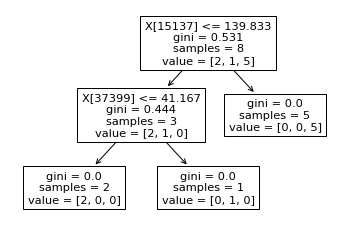

In [ ]:
from sklearn import tree
tree.plot_tree(ml_model)


A4. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study 
the model & graph. Find the differences between the default criterion and entropy criterion. Refer 
code below for criterion.

In [ ]:
train_featVecs, test_featVecs, train_labels, test_labels = train_test_split(Class,Class_label,test_size=0.2)
ml_model1 = tree.DecisionTreeClassifier(criterion="entropy")
ml_model1 = ml_model.fit(train_featVecs,train_labels)
ml_model1.score(train_featVecs, train_labels)



1.0

In [ ]:
ml_model1.score(test_featVecs,test_labels)#Test Set Accuracy

1.0

[Text(200.88000000000002, 181.2, 'X[8232] <= 156.333\nentropy = 1.406\nsamples = 8\nvalue = [3, 1, 4]'),
 Text(133.92000000000002, 108.72, 'X[62934] <= 139.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]')]

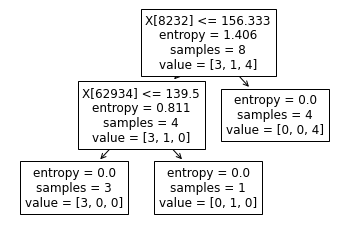

In [ ]:
from sklearn import tree
tree.plot_tree(ml_model1)
